# Mejora de Imagen: Operaciones Elementales

Dataset: https://www.kaggle.com/datasets/soumikrakshit/dark-face-dataset

# Código

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter
from matplotlib.gridspec import GridSpec

class ImageProcessing:
    def show_image(self, image):
        # Mostrar la imagen en una gráfica convertida a RGB
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    def read_image(self, path):
        # Leer la imagen
        image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        if image is None:
            raise FileNotFoundError(f"No se pudo cargar la imagen desde la ruta: {path}")
        #return self.convert_to_8bit(image)
        return image
    
    def save_image(self, image, name):
        # Guardar la imagen
        cv2.imwrite(name, image)

    def convert_to_8bit(self, image):
        # Convertir la imagen a 8 bits
        if image.dtype == np.uint16:
            image = (image / 256).astype('uint8')
        elif image.dtype == np.float32 or image.dtype == np.float64:
            image = (image * 255).astype('uint8')
        return image
       
    def black_white(self, image):
        # Convertir la imagen a blanco y negro
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return gray
    
    def negative(self, image):
        # Convertir la imagen a negativo
        negative = cv2.bitwise_not(image)
        return negative
    
    def logaritmic(self, image):
        # Aplicar transformación logarítmica
        log_image = np.log1p(image)
        log_image = (log_image / log_image.max()) * 255
        log_image = log_image.astype('uint8')
        return log_image
    
    def add_images(self, image1, image2):
        # Sumar dos imágenes
        added = cv2.add(image1, image2)
        return added
    
    def substract_images(self, image1, image2):
        # Restar dos imágenes
        substracted = cv2.subtract(image1, image2)
        return substracted
    
    def mean_images(self, image1, image2):
        # Promedio de dos imágenes
        mean = cv2.addWeighted(image1, 0.5, image2, 0.5, 0)
        return mean
    
    def spatial_filter_smooth(self, image, kernel):
        # Aplicar un filtro espacial para suavizar la imagen
        smoothed = cv2.filter2D(image, -1, kernel)
        return smoothed

    def spatial_filter_contour(self, image, kernel):
        # Aplicar un filtro espacial para detectar contornos en la imagen
        contour = cv2.filter2D(image, -1, kernel)
        return contour
    
    def contrast(self, image, alpha, beta):
        # Convertir la imagen a contraste
        contrast = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
        return contrast
    
    def gamma(self, image, gamma):
        # Convertir la imagen a gamma
        gamma_corrected = np.power(image / 255.0, gamma)
        gamma_corrected = np.uint8(gamma_corrected * 255)
        return gamma_corrected
    
    def histogram_equalization(self, image):
        # Comprobar si la imagen ya está en escala de grises
        if len(image.shape) == 3:
            # Convertir la imagen a escala de grises
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Asegurarse de que la imagen sea de tipo uint8
        if image.dtype != np.uint8:
            image = image.astype(np.uint8)

        # Aplicar ecualización del histograma
        hist = cv2.equalizeHist(image)
        return hist
    
    def histogram(self, image):
        # Mostrar el histograma de la imagen
        plt.figure(figsize=(10, 10))
        plt.hist(image.ravel(), 256, [0, 256])
        plt.show()

    def remove_noise(self, image):
        # Eliminar el ruido de la imagen
        denoised = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
        return denoised

    def compare_images(self, image1, image2, hist, titulo):
        # Graficar las imágenes para comparar
        # Si hist es True, mostrar el histograma y la frecuencia acumulada de las imágenes
        fig = plt.figure(figsize=(9, 6))
        # Título general
        fig.suptitle(titulo, fontsize=16, fontweight='bold')
        gs = GridSpec(2, 2, height_ratios=[1, 1], hspace=0.3)

        ax1 = fig.add_subplot(gs[0, 0])
        ax1.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), aspect='auto')
        ax1.axis('off')
        ax1.set_title('(a) Imagen Original')

        ax2 = fig.add_subplot(gs[0, 1])
        if len(image2.shape) == 2:  # Si la imagen procesada es en escala de grises
            ax2.imshow(image2, cmap='gray', aspect='auto')
        else:
            ax2.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), aspect='auto')
        ax2.axis('off')
        ax2.set_title('(b) Imagen Procesada')

        if hist:
            # Histograma y frecuencia acumulada para la imagen original
            ax3 = fig.add_subplot(gs[1, 0])
            ax3.hist(image1.ravel(), 256, [0, 256], color='black', alpha=0.5, label='Histograma')
            ax3.set_title('(c) Histograma - Frecuencia Acumulada\nde la Imagen Original')
            ax3.yaxis.set_visible(False)

            # Eje secundario para la frecuencia acumulada
            ax3_twin = ax3.twinx()
            hist1, bins1 = np.histogram(image1.ravel(), 256, [0, 256])
            cum_freq1 = hist1.cumsum()
            ax3_twin.plot(bins1[:-1], cum_freq1, color='red', alpha=0.5, label='Frecuencia Acumulada')
            ax3_twin.yaxis.set_visible(False)

            # Histograma y frecuencia acumulada para la imagen procesada
            ax4 = fig.add_subplot(gs[1, 1])
            ax4.hist(image2.ravel(), 256, [0, 256], color='black', alpha=0.5, label='Histograma')
            ax4.set_title('(d) Histograma - Frecuencia Acumulada \nde la Imagen Procesada')
            ax4.yaxis.set_visible(False)

            # Eje secundario para la frecuencia acumulada
            ax4_twin = ax4.twinx()
            hist2, bins2 = np.histogram(image2.ravel(), 256, [0, 256])
            cum_freq2 = hist2.cumsum()
            ax4_twin.plot(bins2[:-1], cum_freq2, color='red', alpha=0.5, label='Frecuencia Acumulada')
            ax4_twin.yaxis.set_visible(False)

        plt.show()

    def format_axes(self, ax):
        # Formatear los ejes para usar notación científica y ajustar la posición
        formatter = ScalarFormatter(useMathText=True)
        formatter.set_scientific(True)
        formatter.set_powerlimits((0, 1))
        ax.yaxis.set_major_formatter(formatter)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax.yaxis.offsetText.set_visible(False)

        # Agregar el texto de notación científica manualmente en la parte inferior izquierda
        ax.text(0, -0.15, 'x$10^3$', transform=ax.transAxes, fontsize=12, 
                verticalalignment='bottom', horizontalalignment='left')

    def format_axes(self, ax):
        # Format the axes to use scientific notation and adjust the position
        formatter = ScalarFormatter(useMathText=True)
        formatter.set_scientific(True)
        formatter.set_powerlimits((0, 1))
        ax.yaxis.set_major_formatter(formatter)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax.yaxis.offsetText.set_visible(False)

        # Add the scientific notation text manually at the bottom left
        ax.text(0, -0.15, 'x$10^3$', transform=ax.transAxes, fontsize=12, 
                verticalalignment='bottom', horizontalalignment='left')


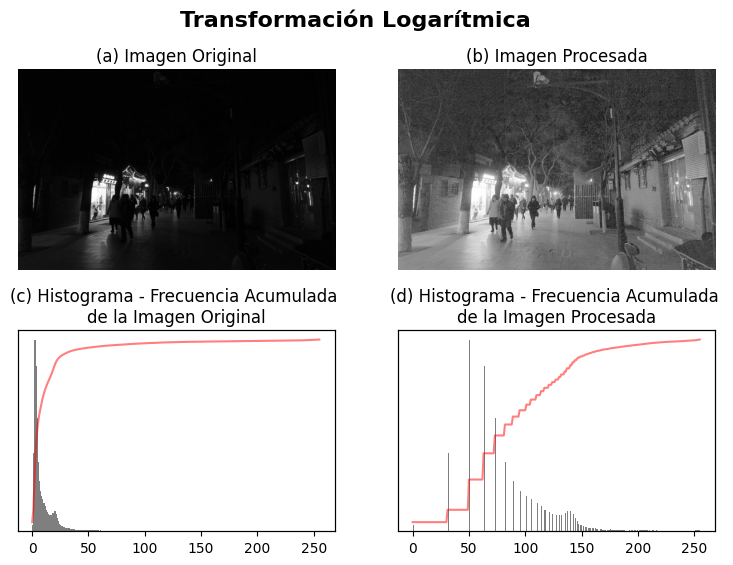

In [3]:
# Load the image
image_path = 'data/3.png'

# Crea un objeto de la clase ImageProcessing
image_processing = ImageProcessing()

# Lee la imagen y la convierte a blanco y negro
image = image_processing.read_image(image_path)
image = image_processing.black_white(image)

# Compara la imagen original con la imagen procesada
image_processing.compare_images(image, image_processing.logaritmic(image), hist=True, titulo='Transformación Logarítmica')

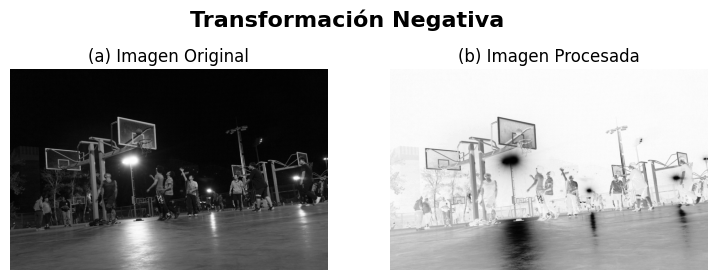

In [18]:
image_processing.compare_images(image, image_processing.negative(image), hist=False, titulo='Transformación Negativa')

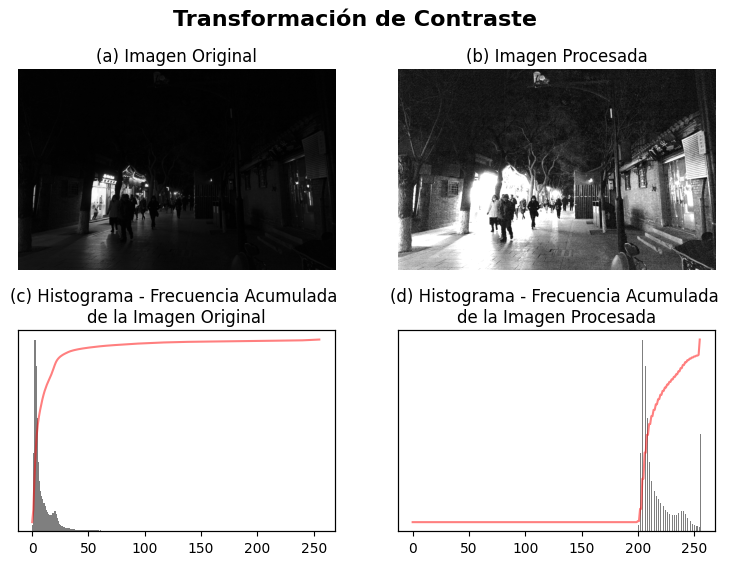

In [5]:
image_processing.compare_images(image, image_processing.contrast(image, 2, 200), hist=True, titulo='Transformación de Contraste')

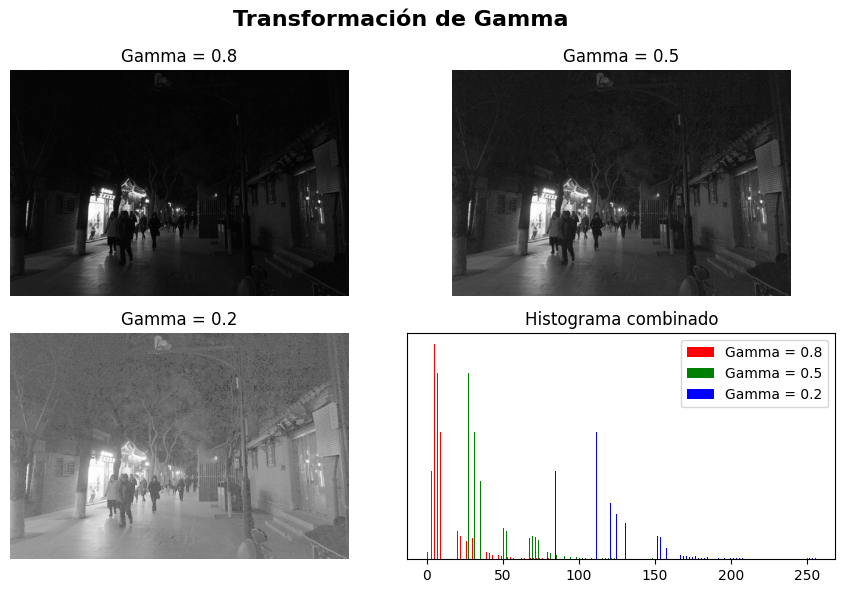

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(9, 6))

# Titulo general
fig.suptitle('Transformación de Gamma', fontsize=16, fontweight='bold')

# Grafica utilizando distintos valores de gamma
axes[0, 0].imshow(image_processing.gamma(image, 0.8), cmap='gray')
axes[0, 0].set_title('Gamma = 0.8')
axes[0, 0].axis('off')
axes[0, 1].imshow(image_processing.gamma(image, 0.5), cmap='gray')
axes[0, 1].set_title('Gamma = 0.5')
axes[0, 1].axis('off')
axes[1, 0].imshow(image_processing.gamma(image, 0.2), cmap='gray')
axes[1, 0].set_title('Gamma = 0.2')
axes[1, 0].axis('off')

# Gráfica con el histograma combinado de las 3 imágenes
hist_bins = np.arange(0, 257)
hist_gamma_08 = image_processing.gamma(image, 0.8).ravel()
hist_gamma_05 = image_processing.gamma(image, 0.5).ravel()
hist_gamma_02 = image_processing.gamma(image, 0.2).ravel()

axes[1, 1].hist([hist_gamma_08, hist_gamma_05, hist_gamma_02], hist_bins, color=['red', 'green', 'blue'], label=['Gamma = 0.8', 'Gamma = 0.5', 'Gamma = 0.2'])
axes[1, 1].set_title('Histograma combinado')
axes[1, 1].legend()
axes[1, 1].yaxis.set_visible(False)


plt.tight_layout()
plt.show()

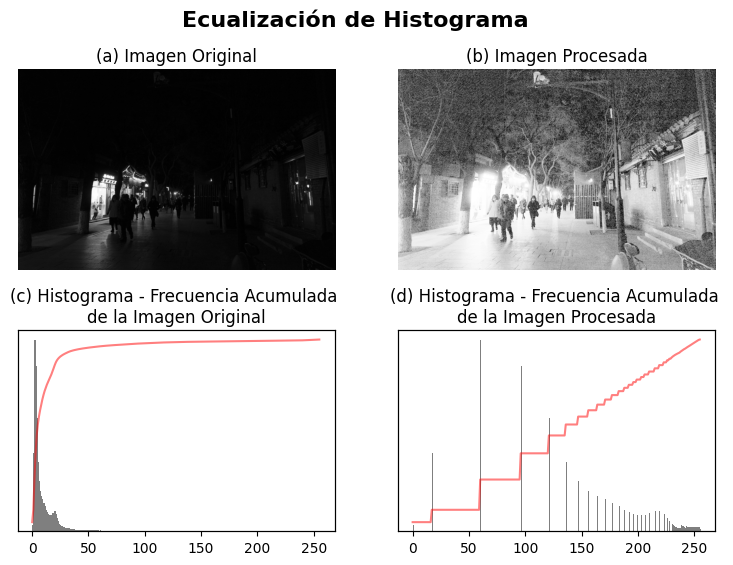

In [7]:
image_processing.compare_images(image, image_processing.histogram_equalization(image), hist=True, titulo='Ecualización de Histograma')

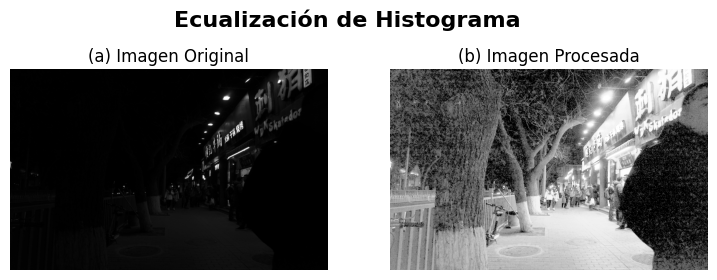

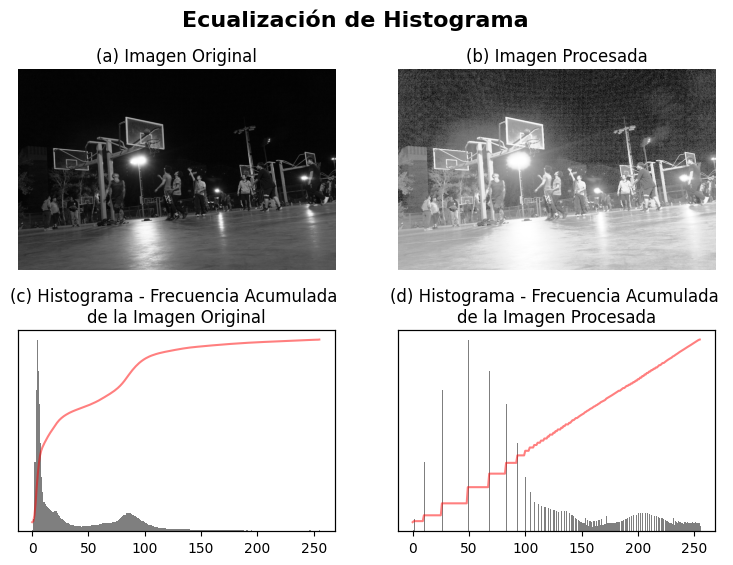

In [15]:
image = image_processing.read_image('data/1.png')

image = image_processing.black_white(image)

image_processing.compare_images(image, image_processing.histogram_equalization(image), hist=False, titulo='Ecualización de Histograma')
image = image_processing.read_image('data/4.png')

image = image_processing.black_white(image)
image_processing.compare_images(image, image_processing.histogram_equalization(image), hist=True, titulo='Ecualización de Histograma')

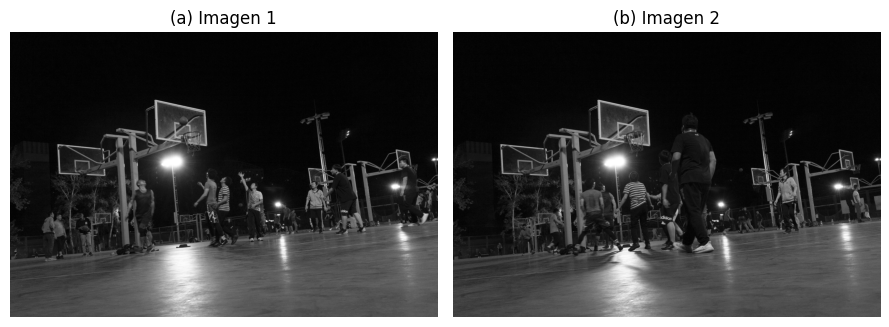

In [16]:
image1= image_processing.read_image('data/4.png')
image2= image_processing.read_image('data/5.png')

image1 = image_processing.black_white(image1)
image2 = image_processing.black_white(image2)

image_sub = image_processing.substract_images(image1, image2)
image_add = image_processing.add_images(image1, image2)
image_mean = image_processing.mean_images(image1, image2)
_, thresholded = cv2.threshold(image_processing.negative(image_sub), 230, 255, cv2.THRESH_BINARY)

#Muestra las dos imagenes image1 y image2
fig, axes = plt.subplots(1, 2, figsize=(9, 6))

axes[0].imshow(image1, cmap='gray')
axes[0].set_title('(a) Imagen 1')
axes[0].axis('off')

axes[1].imshow(image2, cmap='gray')
axes[1].set_title('(b) Imagen 2')
axes[1].axis('off')

plt.tight_layout()
plt.show()

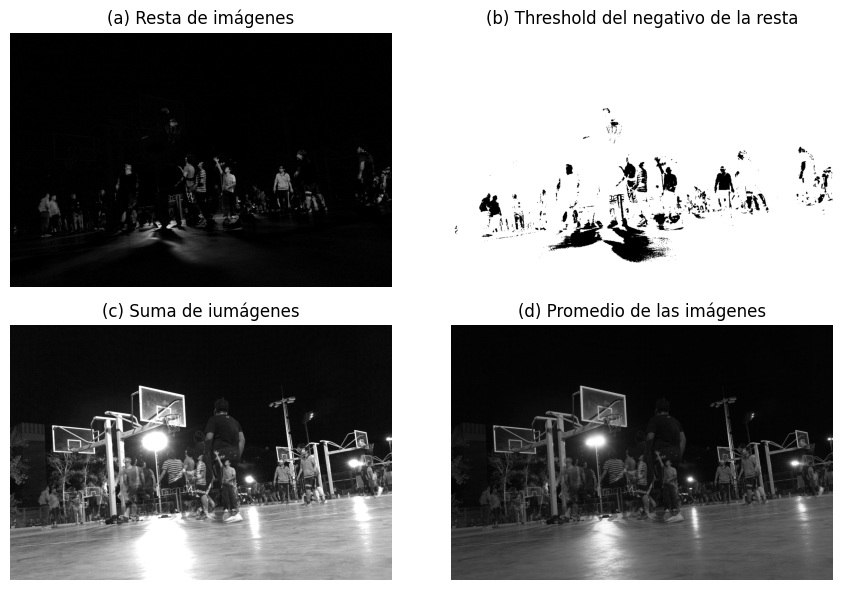

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(9, 6))

# Grafica la resta de las imágenes
axes[0, 0].imshow(image_sub, cmap='gray')
axes[0, 0].set_title('(a) Resta de imágenes')
axes[0, 0].axis('off')

# Grafica el threshold del negativo de la resta
axes[0, 1].imshow(thresholded, cmap='gray')
axes[0, 1].set_title('(b) Threshold del negativo de la resta')
axes[0, 1].axis('off')

# Grafica la suma de las imágenes
axes[1, 0].imshow(image_add, cmap='gray')
axes[1, 0].set_title('(c) Suma de iumágenes')
axes[1, 0].axis('off')

# Grafica el promedio de las imágenes
axes[1, 1].imshow(image_mean, cmap='gray')
axes[1, 1].set_title('(d) Promedio de las imágenes')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()